In [36]:
#originally from @kelu 12/19/2018
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve
import json 
import re
import glob, os

p_serPU90-2.json
second


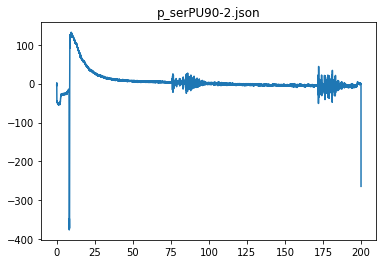

In [31]:
Serie = "wire"
DataSet = {}


for data in glob.glob("*.json"):
    print(data)
    
    
    with open(data) as json_data:
        IDLine = []
        TT1 = []
        TT2 = []
        tmp = [] 
        DataSet[data] = {}
        d = json.load(json_data)
        json_data.close()
        
        A = d["data"][1:]
        
        if (A[0]) > 128:
            print("first")
            for i in range(int(len(A)/2)-1):
                value = 128*(A[2*i+0]&0b0000111) + A[2*i+1] - 512
                IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
                TT1.append( (A[2*i+0] & 0b00001000) / 0b1000)
                TT2.append( (A[2*i+0] & 0b00010000) / 0b10000)
                tmp.append( value ) 
        else:
            print("second")
            for i in range(int(len(A)/2)-1):
                value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
                IDLine.append((A[2*i+1]&0b11110000)/16)
                TT1.append( (A[2*i+1] & 0b00001000) / 0b1000)
                TT2.append( (A[2*i+1] & 0b00010000) / 0b10000)
                tmp.append( value )
        DataSet[data]["data"] = tmp
        DataSet[data]["IDLine"] = IDLine
        DataSet[data]["TT1"] = TT1
        DataSet[data]["TT2"] = TT2
        DataSet[data]["registers"] = d["registers"]
        DataSet[data]["position"] = d["position"]
        DataSet[data]["f"] = float(64/((1.0+int( d["registers"]["237"] ) )))
        t = [ 1.0*x/DataSet[data]["f"] for x in range(len(tmp))]
        DataSet[data]["t"] = t
        
        plt.plot(t,tmp)
        plt.title(data)
        plt.savefig(data+".jpg")
        plt.show()

In [3]:
d.keys()

dict_keys(['firmware_md5', 'target', 'parameters', 'registers', 'position', 'firmware_version', 'data'])

In [4]:
d["parameters"]

{'Pon': 200,
 'PulsesDelay': 300,
 'Poff': 2300,
 'LengthAcq': 202310,
 'DeltaAcq': 2310}

In [5]:
DataSet[data]["f"]

64.0

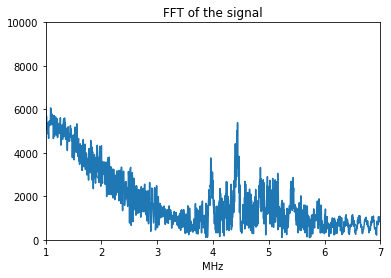

In [35]:
f = [x*64.0/len(tmp) for x in range(len(tmp))]
FFT = np.abs(np.fft.fft(tmp))
             
plt.plot(f[1:int(len(tmp)/2)], FFT[1:int(len(tmp)/2)] )
plt.title("FFT of the signal")
plt.xlabel("MHz")
plt.xlim([1,7])
plt.ylim([0,10000])
plt.show()

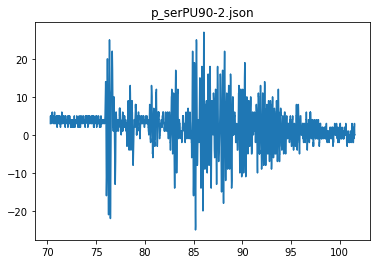

In [33]:
plt.plot(t[4500:6500],tmp[4500:6500])
plt.title(data)
#plt.savefig("nostraw.jpg")
plt.show()

In [26]:
9e-6*1500/2

0.00675